In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from glob import glob
import xscale.spectral.fft as xfft

In [7]:
ds = xr.Dataset(coords={'time': ('t', np.arange(3000)*3600.)})
ds = ds.assign(u=np.cos(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
ds = ds.assign(v=np.sin(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
print(ds)

<xarray.Dataset>
Dimensions:  (t: 3000)
Coordinates:
    time     (t) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...
Dimensions without coordinates: t
Data variables:
    u        (t) float64 0.1618 0.9611 0.2489 -0.8192 -0.4361 -1.713 -0.7272 ...
    v        (t) float64 -0.5223 1.357 -0.3878 0.1928 1.719 -1.157 -0.1499 ...


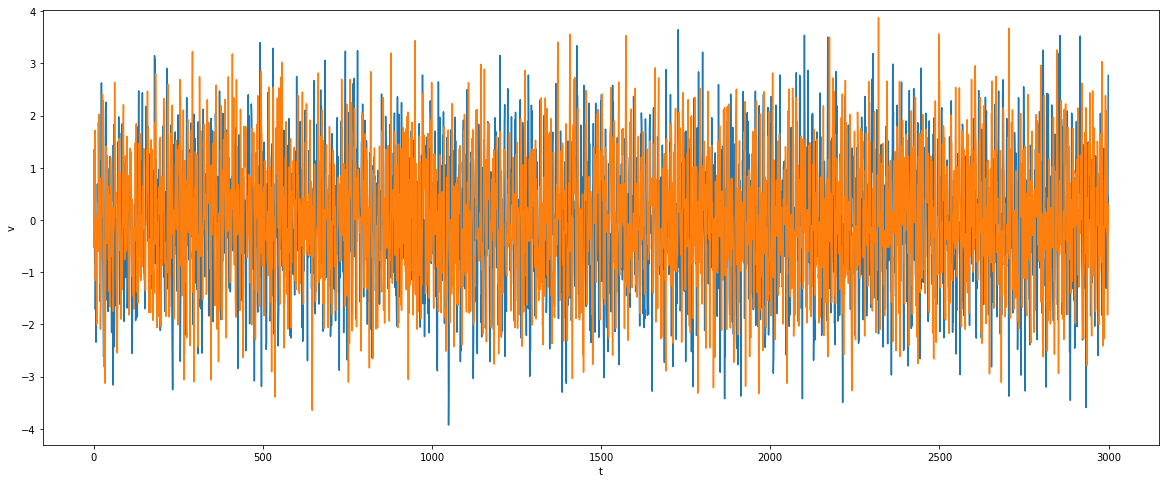

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
ds['u'].plot()
ds['v'].plot()

# Xscale (Spectral test)

_______

In [9]:
u = ds['u']

In [10]:
u_time_spectrum = xfft.fft(u, dim='t', dx=1., detrend='mean', tapering=True, shift=False, sym=True)

In [11]:
u_time_spectrum

<xarray.DataArray 'spectrum' (f_t: 3000)>
dask.array<shape=(3000,), dtype=complex128, chunksize=(3000,)>
Coordinates:
  * f_t      (f_t) float64 0.0 0.0003333 0.0006667 0.001 0.001333 0.001667 ...
Attributes:
    ps_factor:   1.1111111111111111e-07
    psd_factor:  0.0003333333333333333

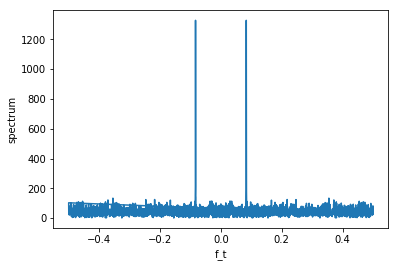

In [12]:
np.abs(u_time_spectrum).plot()

In [13]:
%time uv_complex = (ds['u'] + 1j*ds['v'])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.21 ms


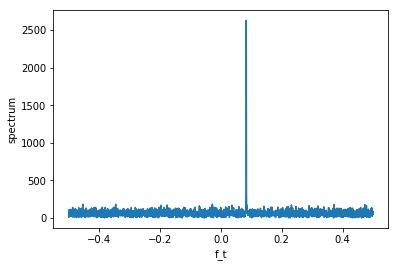

In [14]:
uv_time_spectrum = xfft.fft(uv_complex, dim='t', dx=1., detrend='mean', tapering=True, shift=False, sym=True)
np.abs(uv_time_spectrum).plot()

<xarray.DataArray 'spectrum' (f_t: 3000)>
dask.array<shape=(3000,), dtype=complex128, chunksize=(3000,)>
Coordinates:
  * f_t      (f_t) float64 0.0 0.0003333 0.0006667 0.001 0.001333 0.001667 ...


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/dask/array/chunk.py:228: ComplexWarning: Casting complex values to real discards the imaginary part
  return x.astype(astype_dtype, **kwargs)


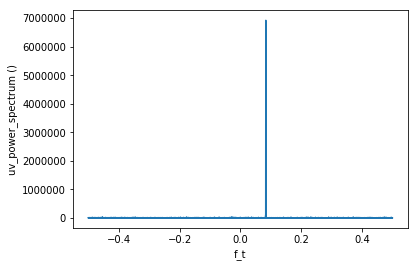

In [15]:
E_uv = (uv_time_spectrum*uv_time_spectrum.conj()).where(uv_time_spectrum!=0., drop=False)
print(E_uv)
E_uv = E_uv.astype('f8').rename('uv_power_spectrum ()')
np.abs(E_uv).plot()

In [16]:
from xscale.spectral.tools import plot_spectrum

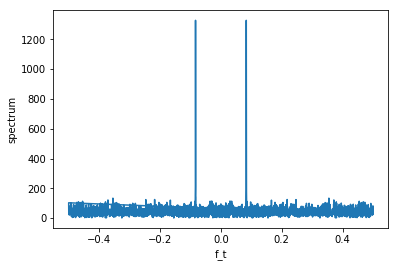

In [17]:
u_time_amplitude = xfft.amplitude(u_time_spectrum)
np.abs(u_time_amplitude).plot()

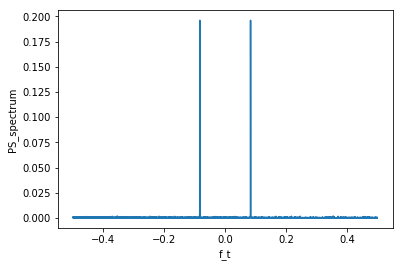

In [18]:
u_time_ps = xfft.ps(u_time_spectrum)
np.abs(u_time_ps).plot()



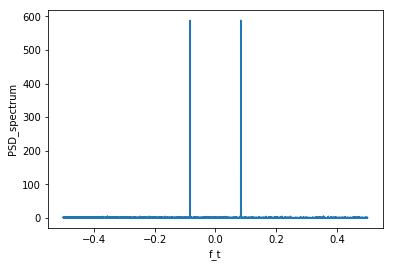

In [19]:
u_time_psd = xfft.psd(u_time_spectrum)
np.abs(u_time_psd).plot()

In [20]:
print(u_time_psd)

<xarray.DataArray 'PSD_spectrum' (f_t: 3000)>
dask.array<shape=(3000,), dtype=float64, chunksize=(3000,)>
Coordinates:
  * f_t      (f_t) float64 0.0 0.0003333 0.0006667 0.001 0.001333 0.001667 ...
Attributes:
    description:  Power Spectrum Density (PSD)
